In [11]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [12]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [13]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [42]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']
data_x.loc[4:6]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04
5,10,2132,31,0,0.0,2,1096.0,2,4110,19.0,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42
6,11,3379,40,0,3.0,0,1020.0,2,38,0.0,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69


#### Scaling the data

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 56)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
tree = DecisionTreeClassifier()
tree.fit(train_x,train_y)
test_predict = tree.predict(test_x)
confusionMatrix = confusion_matrix(test_y,test_predict)
confusionMatrix

array([[3706,  703],
       [ 581,  527]], dtype=int64)

### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [23]:
#importing Decision tree and metric accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Creating instance of Tree

tree =  DecisionTreeClassifier()

# Fitting the model
tree.fit(train_x,train_y)

# Predicting over the Test Set and accuracy-score
test_predict = tree.predict(test_x)
k = accuracy_score(test_y,test_predict)
print('Test accuracy_score    ', k)
k = precision_score(test_y,test_predict) 
print('Test precision_score    ', k)
k = recall_score(test_y,test_predict)
print('Test recall_score    ', k)

Test accuracy_score     0.772521297806779
Test precision_score     0.43970467596390483
Test recall_score     0.48375451263537905


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [32]:
dp_list = [i for i in range(3,31)]
train = []
test = []

for depth in dp_list:
    tree = DecisionTreeClassifier(class_weight='balanced',max_depth=depth,random_state=40)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y,trainpred)
    test_acc = accuracy_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth':dp_list,'Train_acc':train,'Test_acc':test})


performance

,max_depth,Train_acc,Test_acc
0,3,0.731480,0.724850
1,4,0.793233,0.776509
2,5,0.804834,0.785934
3,6,0.818248,0.798622
4,7,0.823021,0.786659
5,8,0.832266,0.788653
6,9,0.837100,0.771615
7,10,0.863686,0.777234
8,11,0.877764,0.779228
9,12,0.901813,0.785934


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

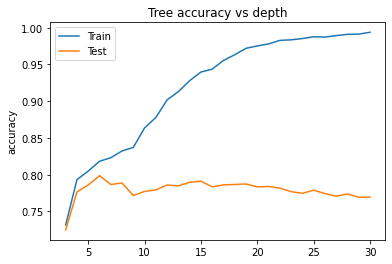

In [33]:
plt.plot(dp_list, train, label='Train')
plt.plot(dp_list,test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

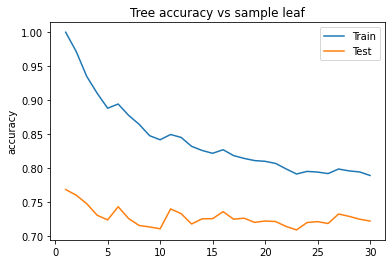

In [36]:
sam_list = [i for i in range(1,31)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=sam,random_state=40)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y,trainpred)
    test_acc = accuracy_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_leaf':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(sam_list,train, label='Train')
plt.plot(sam_list,test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample leaf')
plt.show()



Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

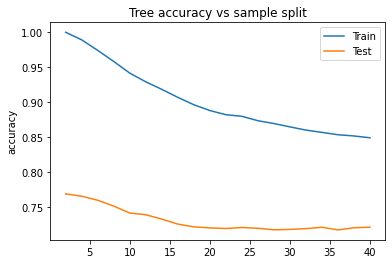

In [37]:
sam_list = [i for i in range(2,41,2)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier(class_weight='balanced',min_samples_split=sam,random_state=40)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y,trainpred)
    test_acc = accuracy_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_split':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(sam_list,train, label='Train')
plt.plot(sam_list,test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample split')
plt.show()




Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [63]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold


i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(data_x,data_y):
    print('\n{} of kfold {}'.format(train_index,test_index))   
    xtr,xvl = data_x.loc[train_index],data_x.loc[test_index]     
    ytr,yvl = data_y[train_index],data_y[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr,ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    ??
    
print("Mean accuracy across the fold is : ",np.mean(accuracy_list))    
    


[    0     1     2 ... 22062 22064 22066] of kfold [   14    15    18 ... 22054 22063 22065]
accuracy_score 0.771635704576348

[    0     2     5 ... 22063 22065 22066] of kfold [    1     3     4 ... 22055 22058 22064]
accuracy_score 0.7673312188491165

[    0     1     2 ... 22064 22065 22066] of kfold [    7    13    17 ... 22033 22038 22048]
accuracy_score 0.7795150691139814

[    0     1     3 ... 22063 22064 22065] of kfold [    2     8     9 ... 22061 22062 22066]
accuracy_score 0.7799682755495128

[    1     2     3 ... 22064 22065 22066] of kfold [    0     5     6 ... 22053 22059 22060]
accuracy_score 0.7697711307500567
Mean accuracy across the fold is :  0.7736442797678029



IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma